In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/stacked_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 202s 15ms/step


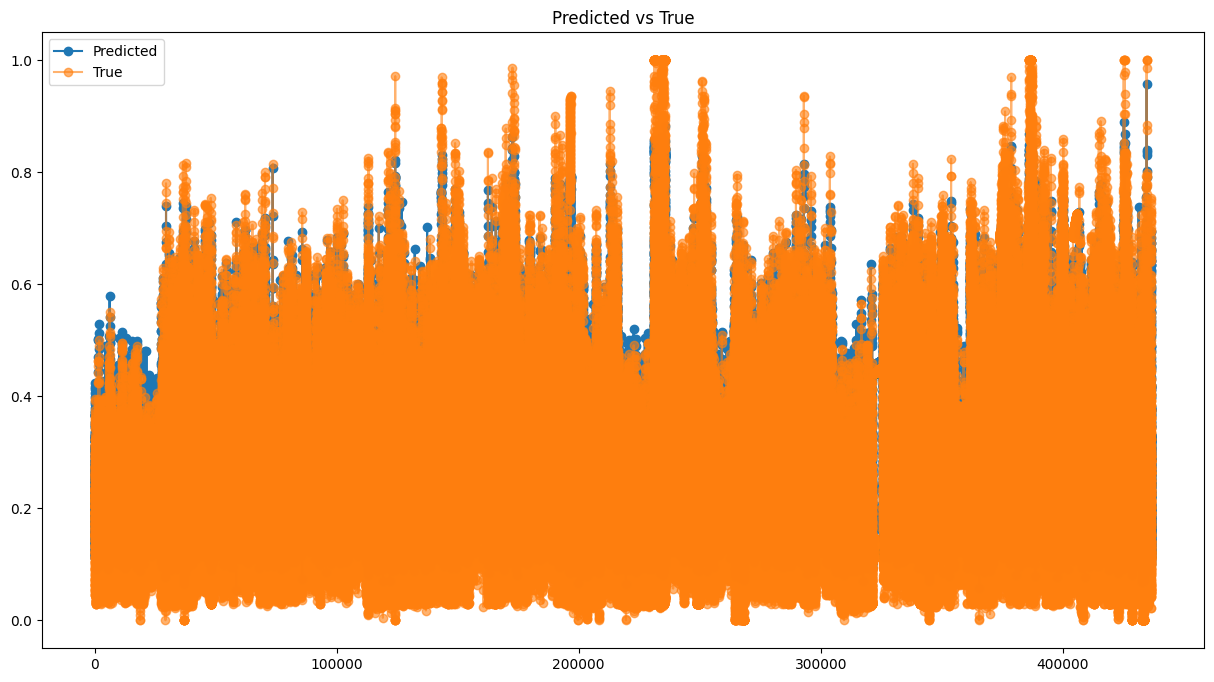

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04285356531958601,
 'mse': 0.05133145308543418,
 'rmse': 0.0026349180758621304}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          158.231842
1          161.251862
2          154.284821
3          158.116272
4          152.358887
...               ...
436585     110.460060
436586     143.015366
436587     186.274643
436588     212.825897
436589     212.501099

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  158.231842
2023-01-01 00:15:00   140.0  161.251862
2023-01-01 00:30:00   139.0  154.284821
2023-01-01 00:45:00   145.0  158.116272
2023-01-01 01:00:00   159.0  152.358887
...                     ...         ...
2035-06-14 18:15:00   137.0  110.460060
2035-06-14 18:30:00   177.0  143.015366
2035-06-14 18:45:00   198.0  186.274643
2035-06-14 19:00:00   216.0  212.825897
2035-06-14 19:15:00   233.0  212.501099

[436590 rows x 2 columns]

AP, BE, EP: (0.8888313722975155, 0.05368206711575418, 0.05748656058673031)


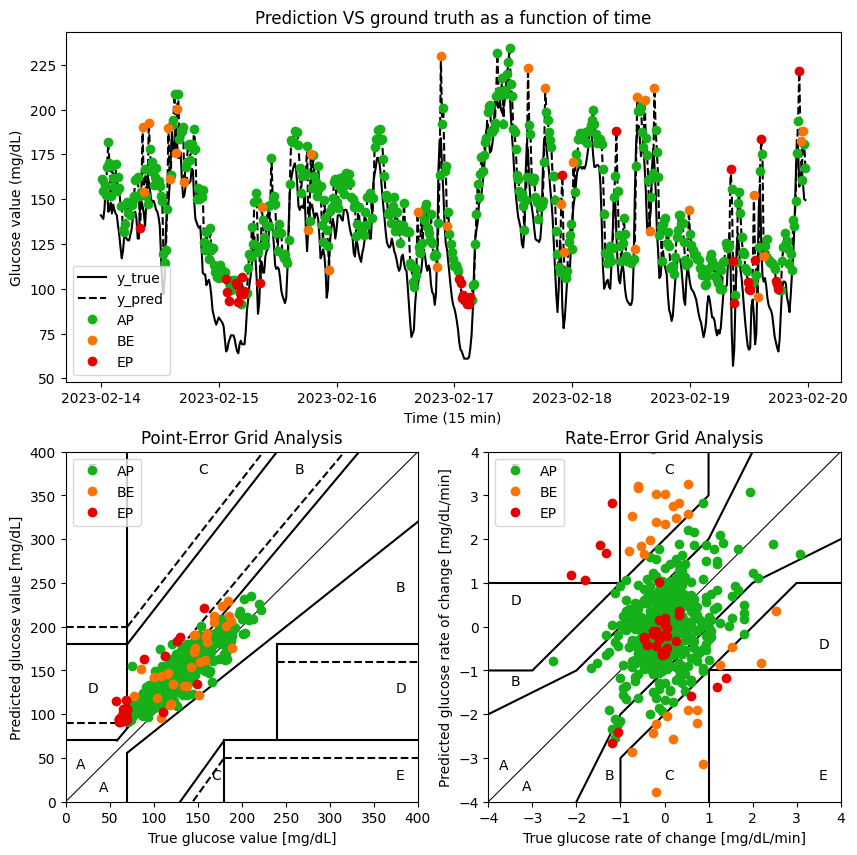

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  158.231842       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  161.251862 -0.066667  0.201335     AP   
2      2023-02-14 00:30:00   139.0  154.284821 -0.066667 -0.464469     AP   
3      2023-02-14 00:45:00   145.0  158.116272  0.400000  0.255430     AP   
4      2023-02-14 01:00:00   159.0  152.358887  0.933333 -0.383826     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0  110.460060  2.333333  0.052834     BE   
436586 2035-07-28 18:30:00   177.0  143.015366  2.666667  2.170354     AP   
436587 2035-07-28 18:45:00   198.0  186.274643  1.400000  2.883952     AP   
436588 2035-07-28 19:00:00   216.0  212.825897  1.200000  1.770084     AP   
436589 2035-07-28 19:15:00   233.0  212.501099  1.133333 -0.021653     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     A    lD  
436586     A     A  
436587     A     B  
436588     A     A  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 187ms/step


Glucose level Predict  Glucose level True
0               0.257026            0.219565
1               0.263591            0.217391

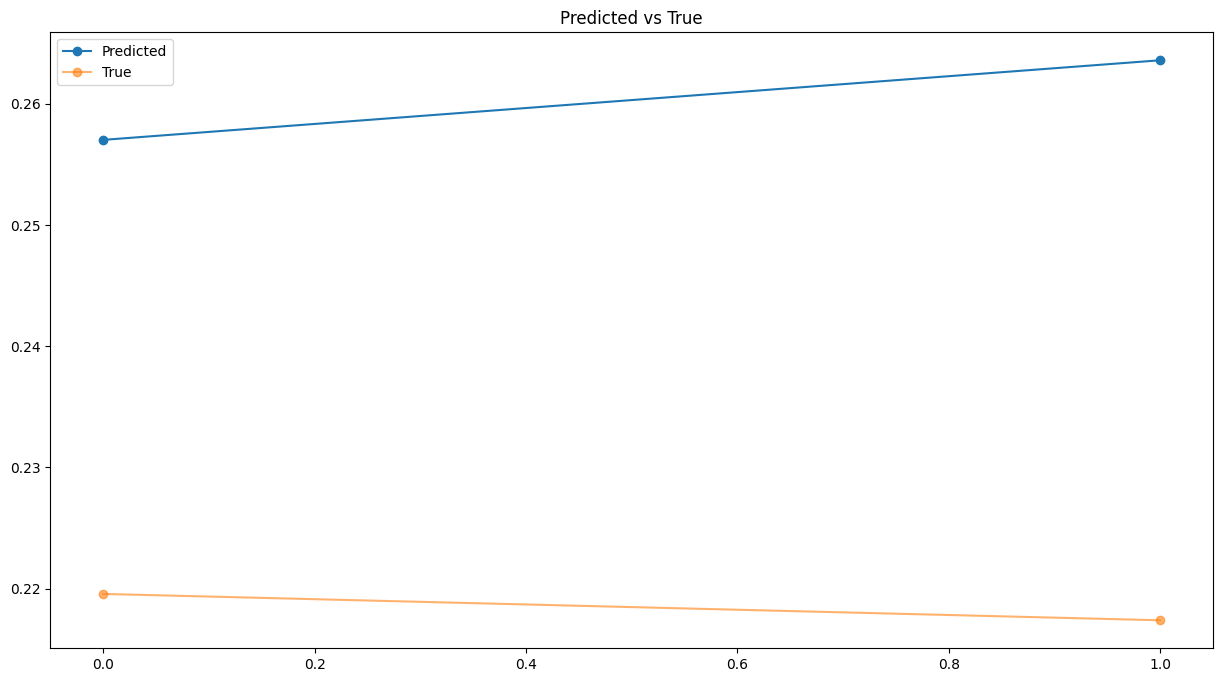

{'mae': 0.04183007932227589,
 'mse': 0.04205768667757571,
 'rmse': 0.0017688490086691293}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             158.231827               141.0
1             161.251862               140.0

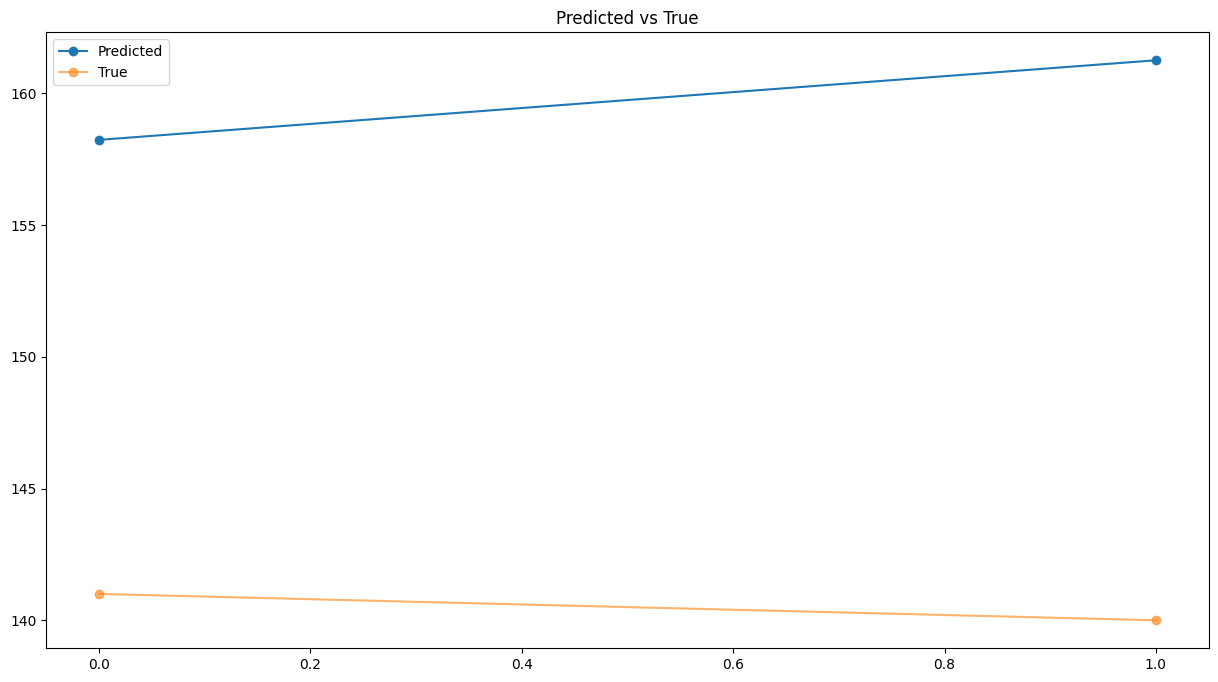

{'mae': 19.241844177246094,
 'mse': 19.346543289944602,
 'rmse': 374.2887372697005}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 72ms/step


Glucose level Predict  Glucose level True
0               0.257026            0.219565
1               0.322916            0.217391

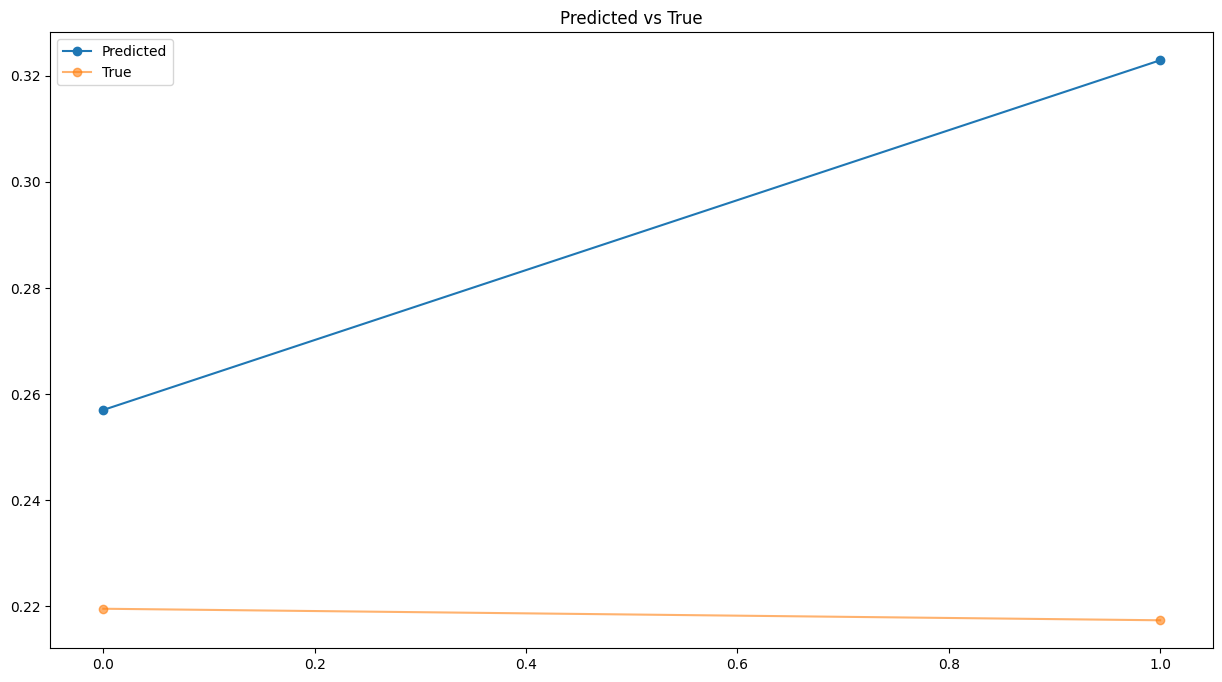

{'mae': 0.07149264371913411,
 'mse': 0.07917944697802903,
 'rmse': 0.0062693848237465105}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             158.231842               141.0
1             188.541412               140.0

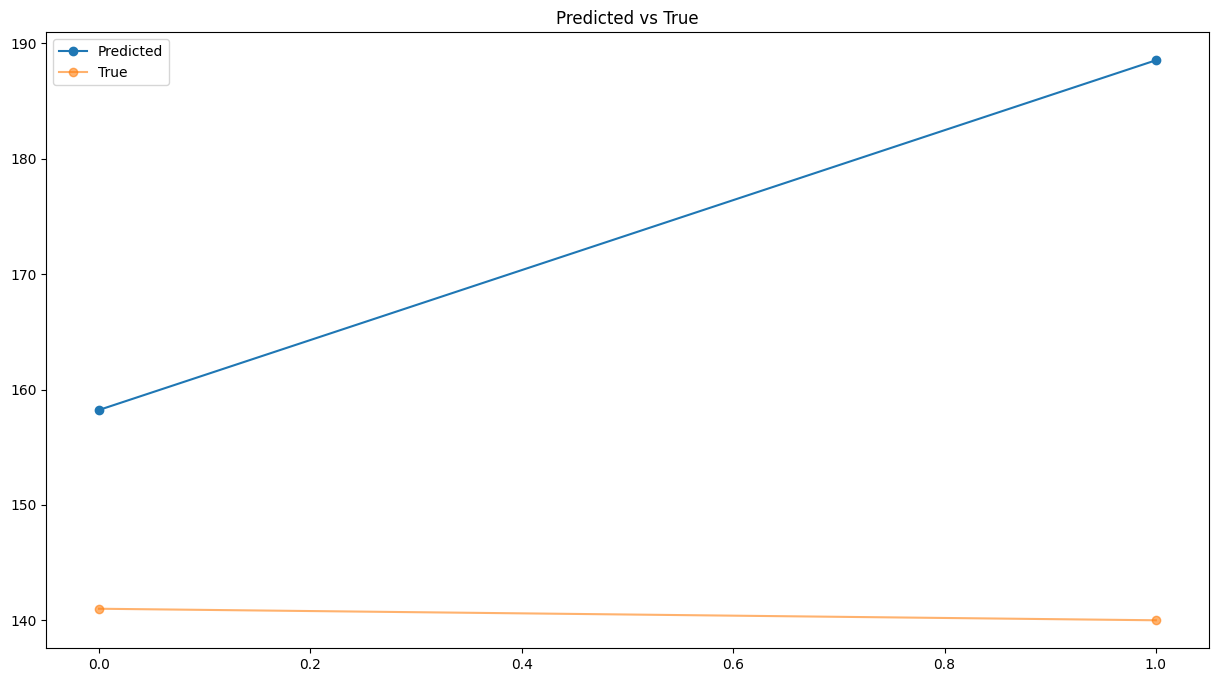

{'mae': 32.886627197265625,
 'mse': 36.42255546636282,
 'rmse': 1326.6025467002764}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 14ms/step


Glucose level Predict  Glucose level True
0               0.306173            0.182609
1               0.263906            0.154348
2               0.179896            0.152174
3               0.198962            0.150000
4               0.188536            0.123913

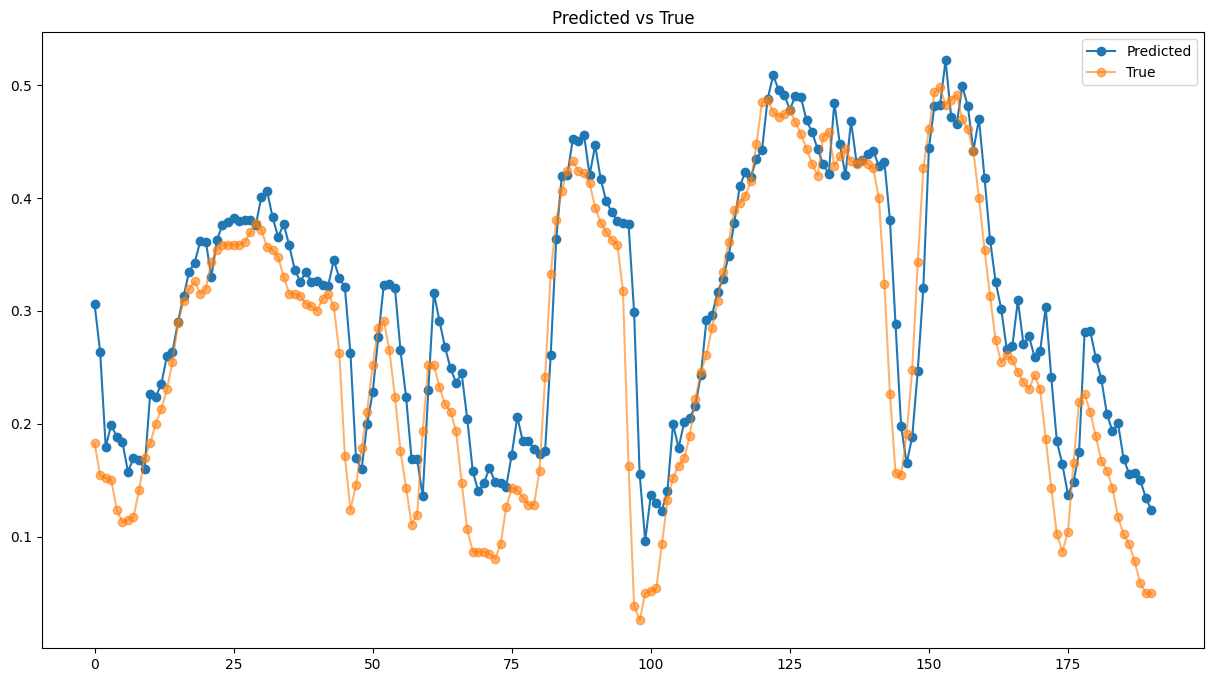

{'mae': 0.04343679588285524,
 'mse': 0.05737509799989739,
 'rmse': 0.0032919018704978295}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

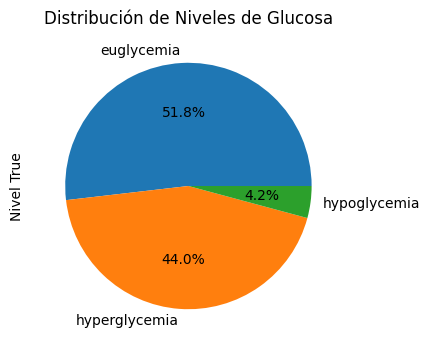

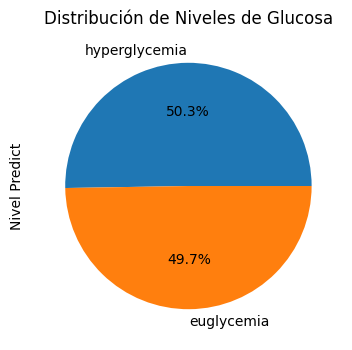

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0               124.0  euglycemia             180.839645  hyperglycemia
1               111.0  euglycemia             161.396622     euglycemia
2               110.0  euglycemia             122.751968     euglycemia
3               109.0  euglycemia             131.522659     euglycemia
4                97.0  euglycemia             126.726410     euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


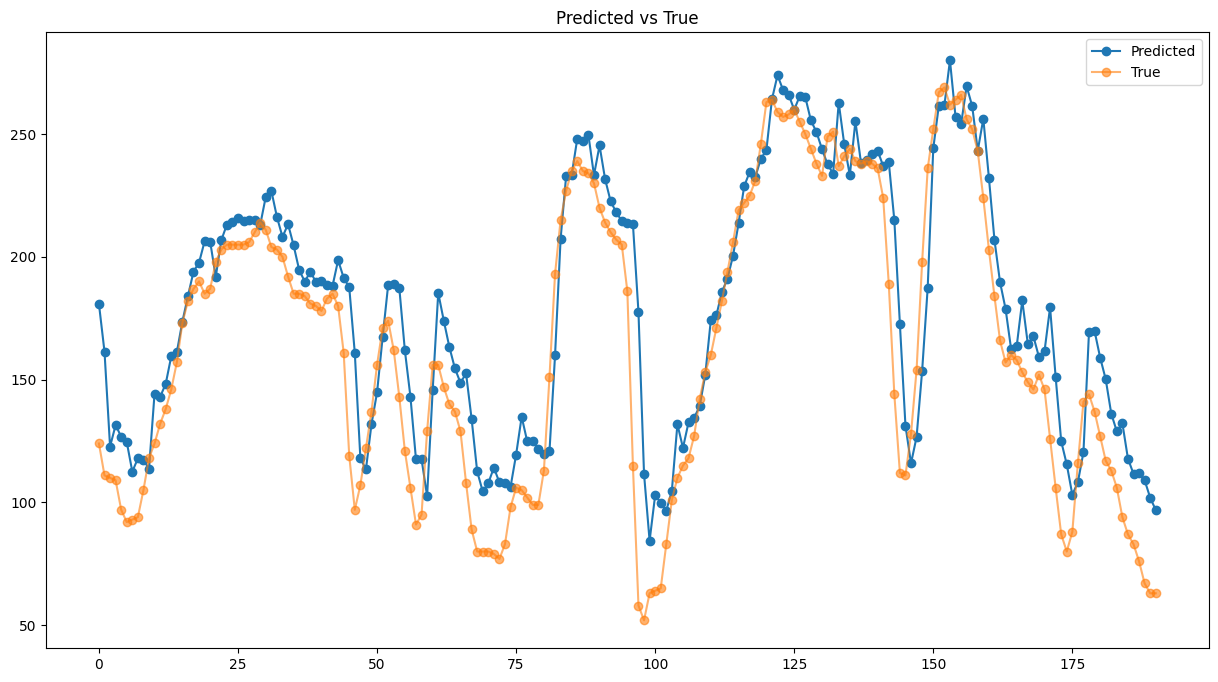

{'mae': 19.980926313949507,
 'mse': 26.392545687725185,
 'rmse': 696.5664678786613}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  180.839645
2023-01-01 00:15:00   111.0  161.396622
2023-01-01 00:30:00   110.0  122.751968
2023-01-01 00:45:00   109.0  131.522659
2023-01-01 01:00:00    97.0  126.726410
...                     ...         ...
2023-01-02 22:30:00    83.0  111.640366
2023-01-02 22:45:00    76.0  111.829277
2023-01-02 23:00:00    67.0  109.027702
2023-01-02 23:15:00    63.0  101.909836
2023-01-02 23:30:00    63.0   96.902603

[191 rows x 2 columns]

AP, BE, EP: (0.8842105263157894, 0.05789473684210526, 0.05789473684210526)


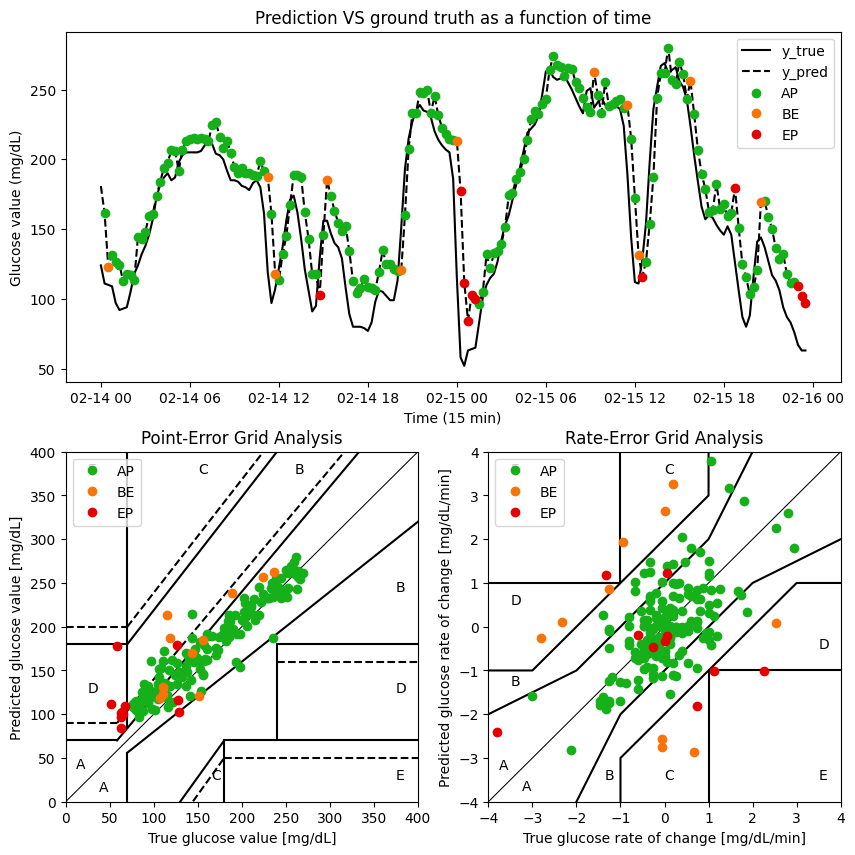

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 14ms/step


Glucose level Predict  Glucose level True
0               0.347506            0.373913
1               0.403346            0.400000
2               0.410760            0.404348
3               0.440916            0.406522
4               0.416717            0.397826

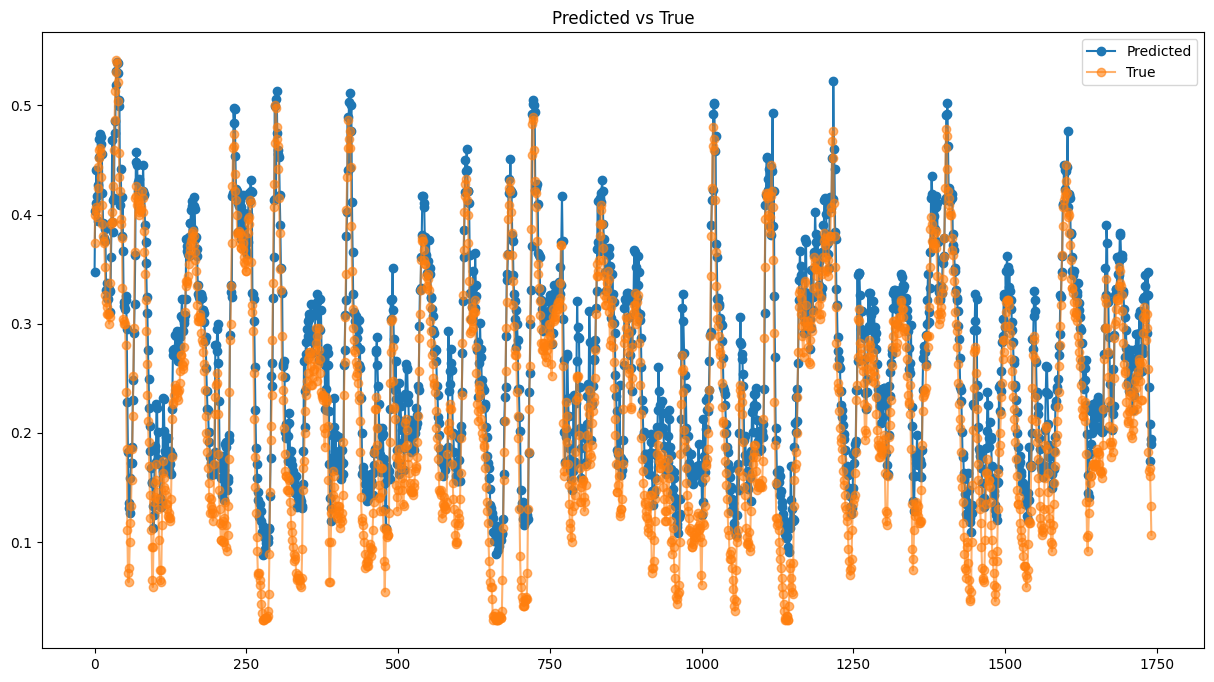

{'mae': 0.04187471607568611,
 'mse': 0.04804408109795131,
 'rmse': 0.002308233728546522}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

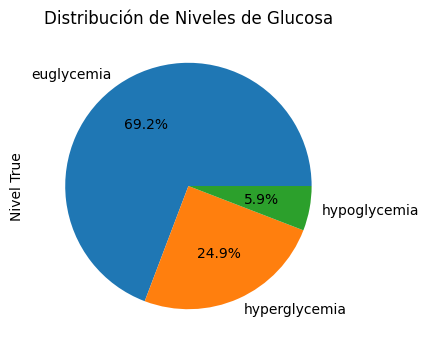

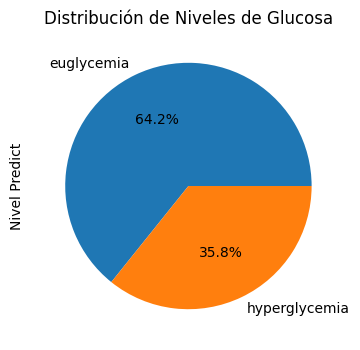

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             199.852646  hyperglycemia
1               224.0  hyperglycemia             225.539200  hyperglycemia
2               226.0  hyperglycemia             228.949814  hyperglycemia
3               227.0  hyperglycemia             242.821411  hyperglycemia
4               223.0  hyperglycemia             231.689621  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


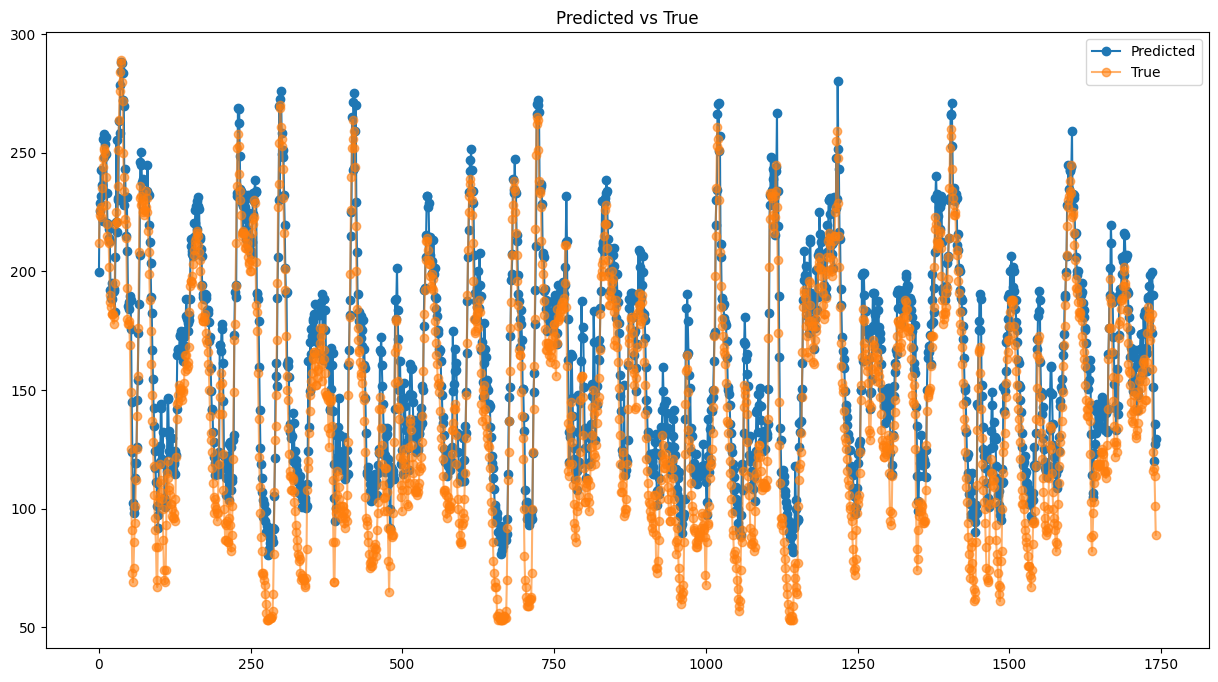

{'mae': 19.262370577088454,
 'mse': 22.10027826474652,
 'rmse': 488.4222993792275}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  199.852646
2023-01-01 00:15:00   224.0  225.539200
2023-01-01 00:30:00   226.0  228.949814
2023-01-01 00:45:00   227.0  242.821411
2023-01-01 01:00:00   223.0  231.689621
...                     ...         ...
2023-01-19 02:15:00   116.0  151.196976
2023-01-19 02:30:00   117.0  120.252777
2023-01-19 02:45:00   114.0  135.819229
2023-01-19 03:00:00   101.0  127.318985
2023-01-19 03:15:00    89.0  129.543091

[1742 rows x 2 columns]

AP, BE, EP: (0.9086731763354394, 0.028144744399770247, 0.06318207926479034)


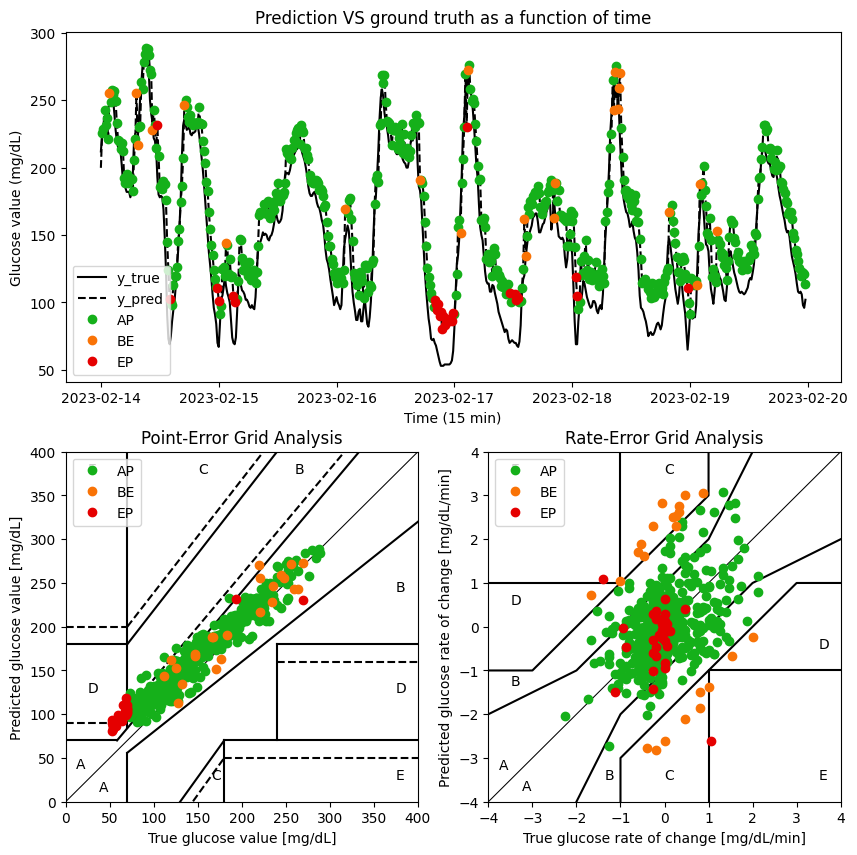

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 2s 17ms/step


Glucose level Predict  Glucose level True
0               0.322697            0.261858
1               0.288251            0.229051
2               0.265519            0.196245
3               0.224674            0.163439
4               0.200003            0.130632

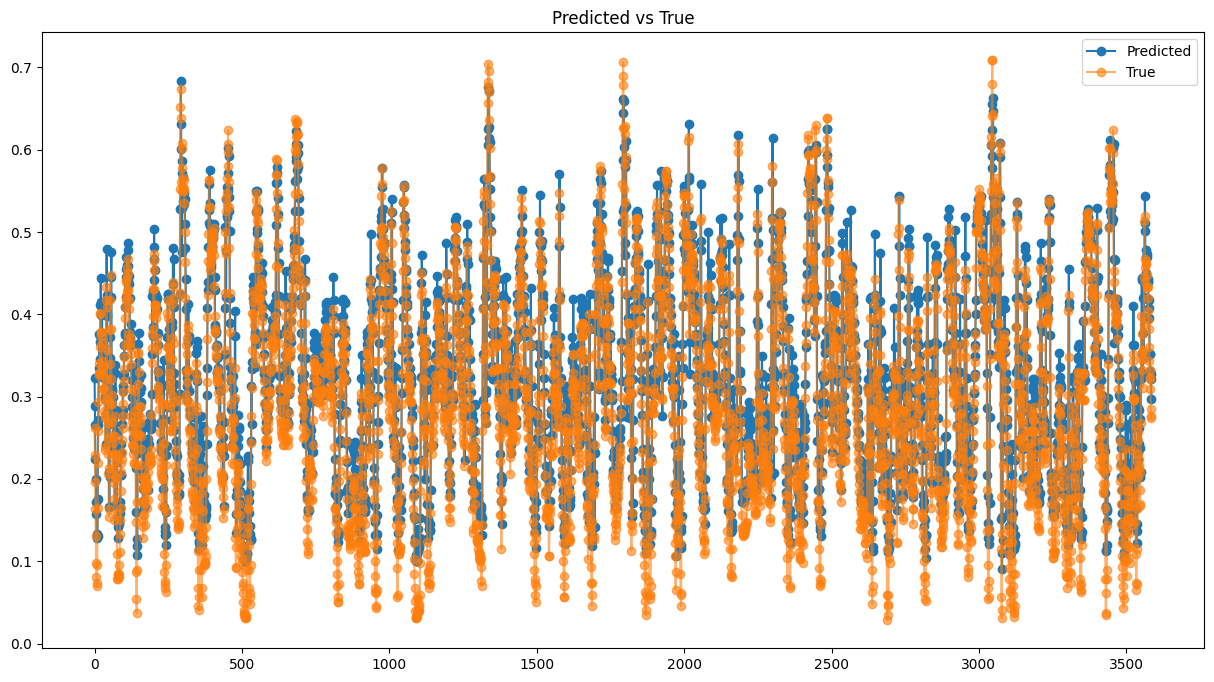

{'mae': 0.04382628856730308,
 'mse': 0.05301697163638864,
 'rmse': 0.002810799281493637}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

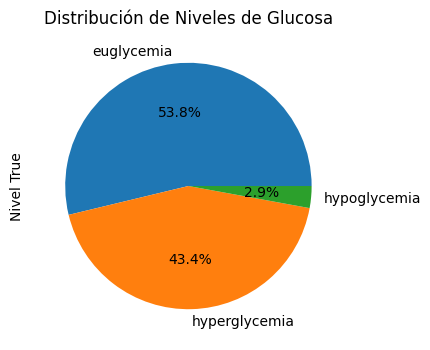

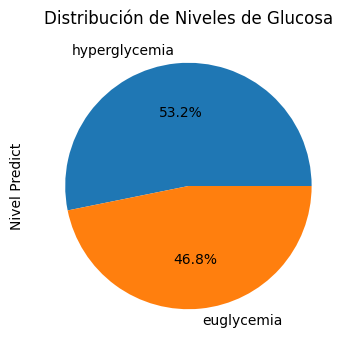

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             188.440781  hyperglycemia
1          145.363636  euglycemia             172.595444     euglycemia
2          130.272727  euglycemia             162.138885     euglycemia
3          115.181818  euglycemia             143.350235     euglycemia
4          100.090909  euglycemia             132.001160     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


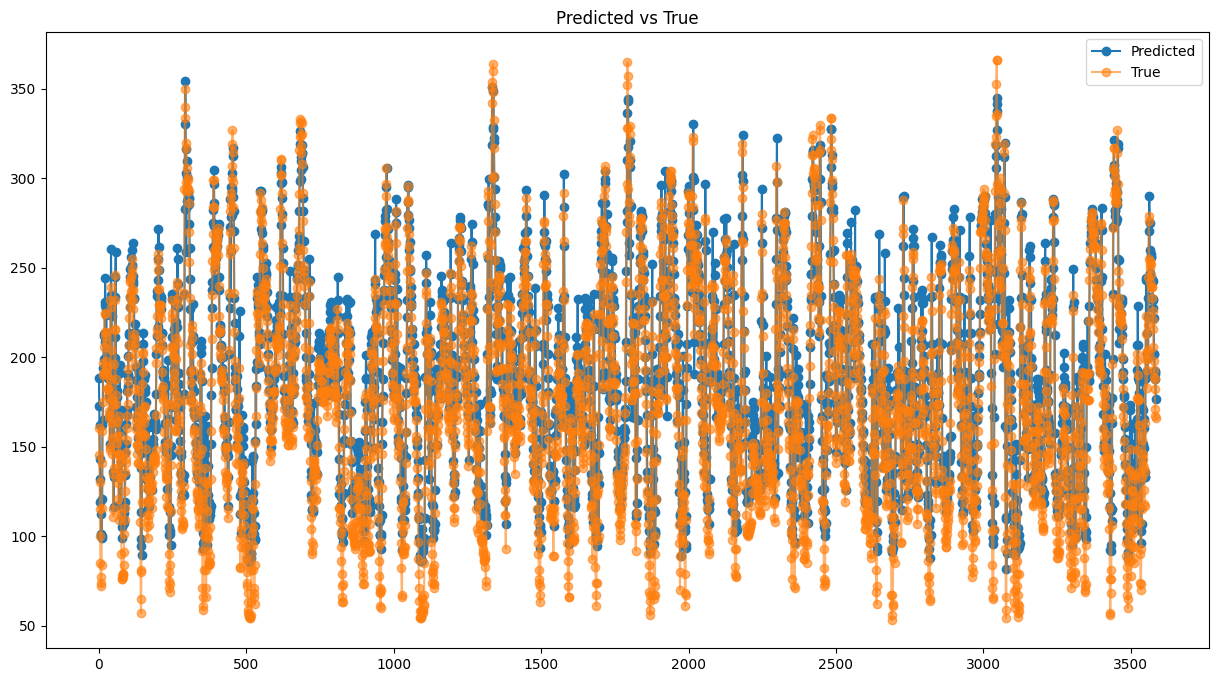

{'mae': 20.160093421941653,
 'mse': 24.38780737142675,
 'rmse': 594.7651483858169}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  188.440781
2023-01-01 00:15:00  145.363636  172.595444
2023-01-01 00:30:00  130.272727  162.138885
2023-01-01 00:45:00  115.181818  143.350235
2023-01-01 01:00:00  100.090909  132.001160
...                         ...         ...
2023-02-07 07:15:00  188.000000  192.322754
2023-02-07 07:30:00  182.000000  191.992828
2023-02-07 07:45:00  171.000000  190.776581
2023-02-07 08:00:00  167.000000  187.920685
2023-02-07 08:15:00  166.000000  176.900726

[3586 rows x 2 columns]

AP, BE, EP: (0.8624825662482566, 0.0803347280334728, 0.05718270571827057)


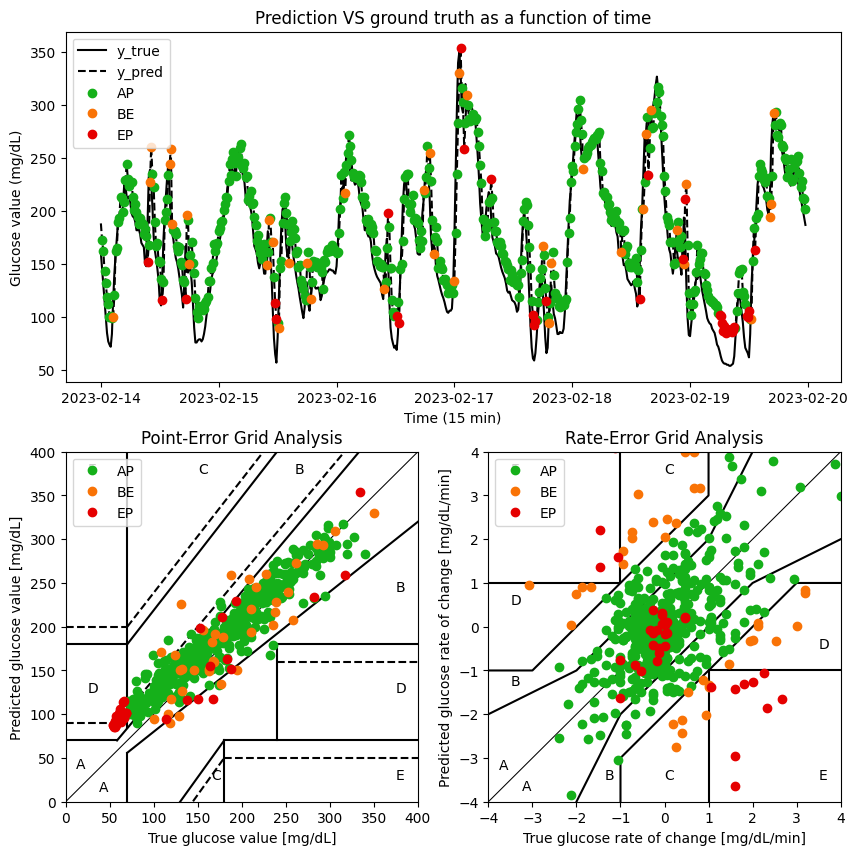

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 3s 17ms/step


Glucose level Predict  Glucose level True
0               0.534270            0.534783
1               0.533620            0.500000
2               0.524013            0.484783
3               0.460928            0.463043
4               0.491140            0.428261

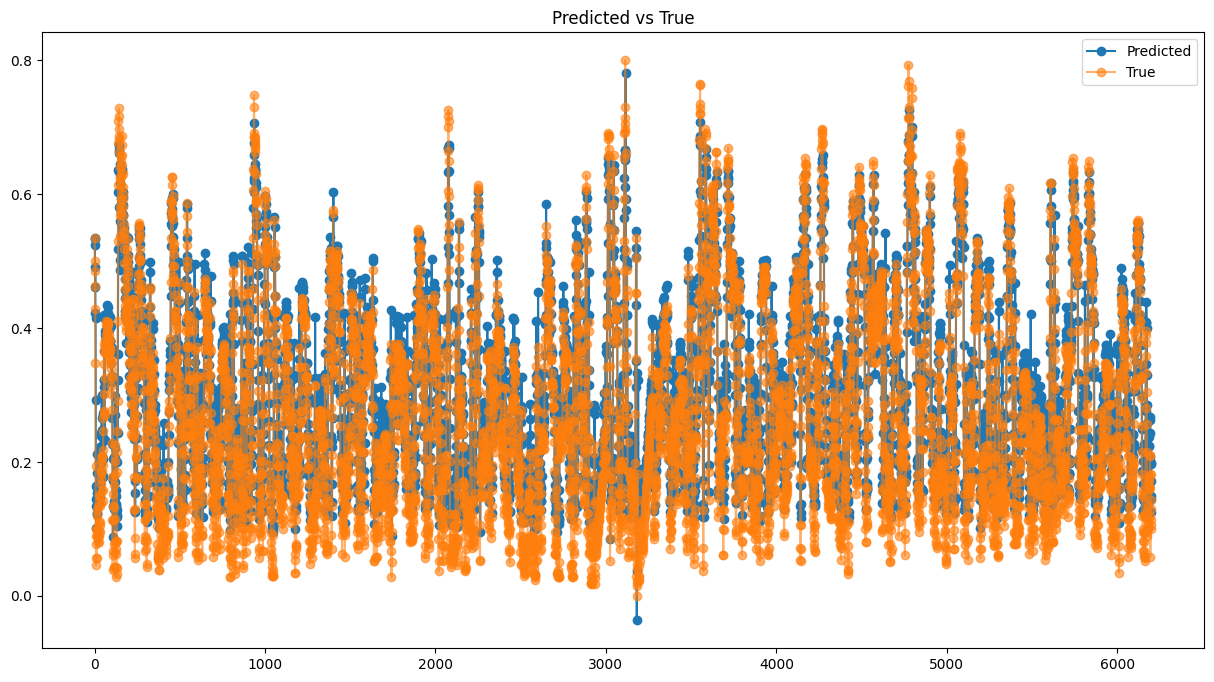

{'mae': 0.04884752555116115,
 'mse': 0.061203203275208104,
 'rmse': 0.003745832091146444}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

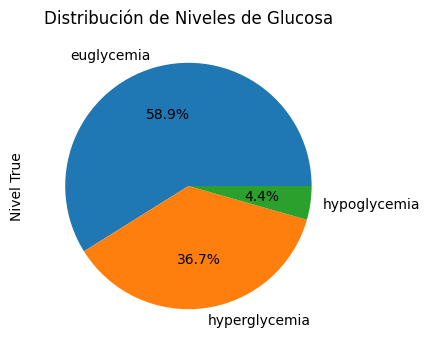

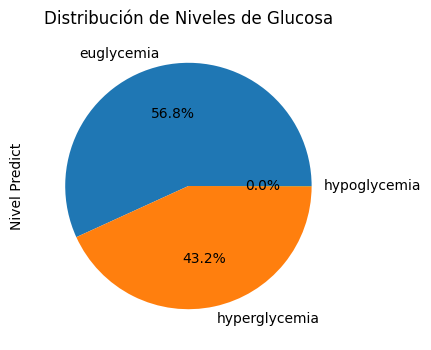

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             285.764038  hyperglycemia
1               270.0  hyperglycemia             285.465424  hyperglycemia
2               263.0  hyperglycemia             281.045837  hyperglycemia
3               253.0  hyperglycemia             252.026855  hyperglycemia
4               237.0  hyperglycemia             265.924622  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


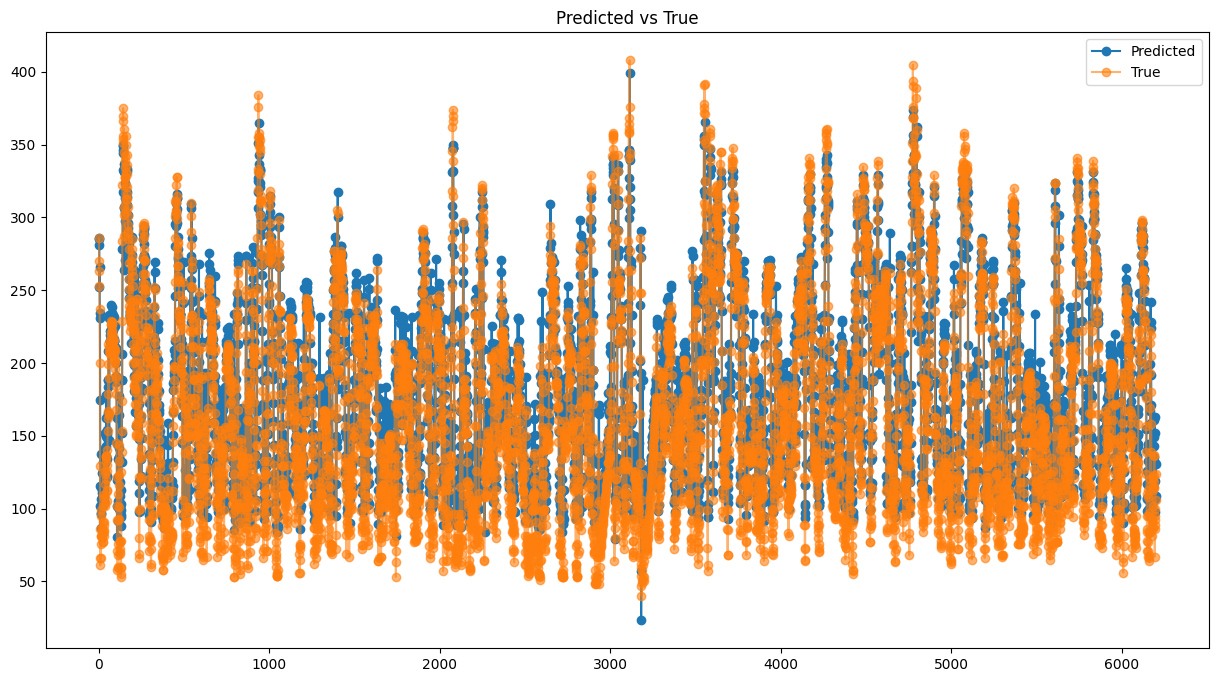

{'mae': 22.46986253399837,
 'mse': 28.153474205373158,
 'rmse': 792.6181098326117}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  285.764038
2023-01-01 00:15:00   270.0  285.465424
2023-01-01 00:30:00   263.0  281.045837
2023-01-01 00:45:00   253.0  252.026855
2023-01-01 01:00:00   237.0  265.924622
...                     ...         ...
2023-03-06 13:00:00   100.0   97.800514
2023-03-06 13:15:00    89.0  131.013611
2023-03-06 13:30:00    92.0  118.915512
2023-03-06 13:45:00   106.0  108.604774
2023-03-06 14:00:00   124.0  130.957626

[6201 rows x 2 columns]

AP, BE, EP: (0.8275806451612904, 0.09467741935483871, 0.07774193548387097)


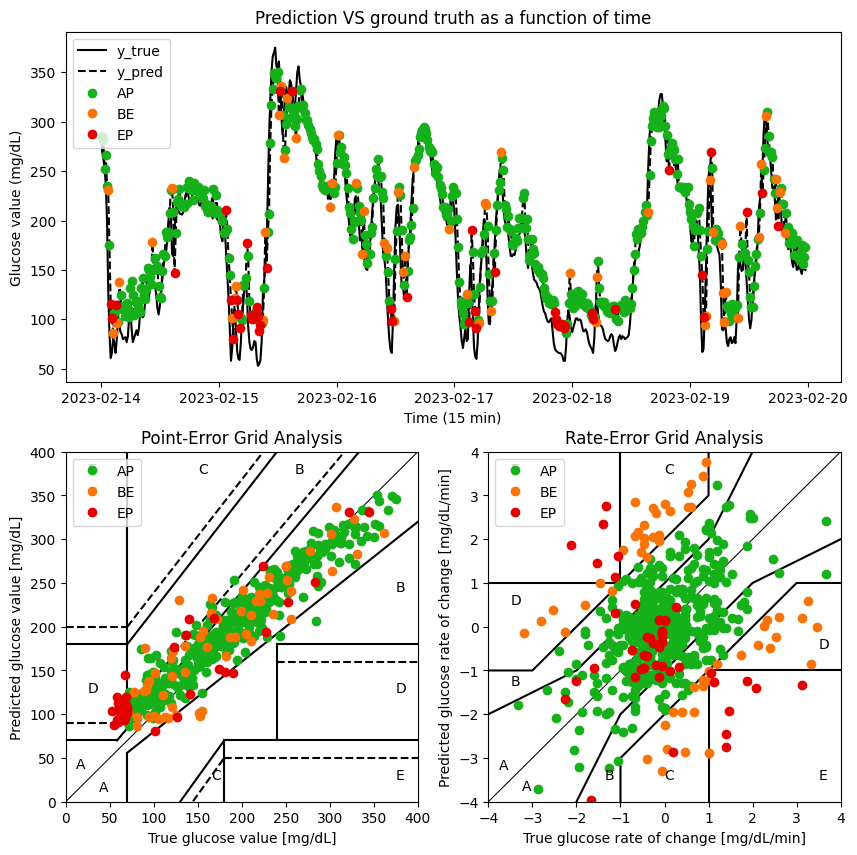

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)